In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [23]:
credit = pd.read_csv('enterprise credit.csv')
credit.head()

,ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,1,1999,0,0.501,0.307,0.043,0.956,0.335
1,1,2000,0,0.550,0.320,0.050,1.060,0.330
2,1,2001,0,0.450,0.230,0.030,0.800,0.250
3,1,2002,0,0.310,0.190,0.030,0.390,0.250
4,1,2003,0,0.450,0.220,0.030,0.790,0.280


In [24]:
del credit['ID']
del credit['Year']
credit.describe()

,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.018000,0.142578,0.210374,0.051813,1.953931,0.303639
std,0.132968,0.170711,0.332539,0.029647,2.994476,0.205834
min,0.000000,-2.240000,-3.310000,-0.590000,0.020000,0.040000
25%,0.000000,0.030000,0.090000,0.040000,0.620000,0.170000
50%,0.000000,0.120000,0.220000,0.050000,1.140000,0.260000
75%,0.000000,0.240000,0.370000,0.070000,2.240000,0.370000
max,1.000000,0.770000,1.640000,0.200000,60.610000,5.010000


In [34]:
X = credit.iloc[:, 1:6]
y = credit.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

area under ROC curve is  0.9772002551020409


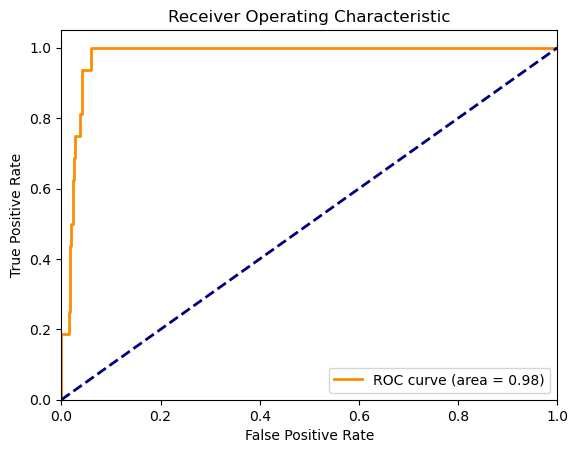

In [37]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
coefficients = logistic_regression.coef_
coefficients

y_pred = logistic_regression.predict(X_test)
y_score = logistic_regression.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('area under ROC curve is ', roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

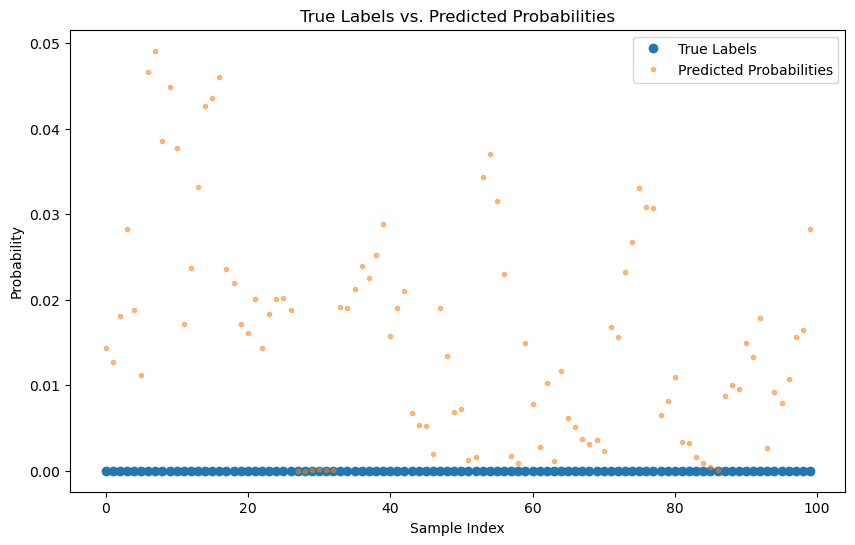

In [51]:
default_prob = logistic_regression.predict_proba(X)
# Extract the probabilities for the positive class
prob_positive_class = default_prob[:100, 1]

# Plotting the true labels
plt.figure(figsize=(10,6))
plt.plot(y[:100], label='True Labels', marker='o', linestyle='')

# Plotting the predicted probabilities for the positive class
plt.plot(prob_positive_class, label='Predicted Probabilities', marker='.', linestyle='', alpha=0.5)

# Adding labels, title, and legend
plt.xlabel('Sample Index')
plt.ylabel('Probability')
plt.title('True Labels vs. Predicted Probabilities')
plt.legend()
plt.show()
